In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('data/mental_health.csv')

# print(df.head())
#                                                 text  label
# 0  dear american teens question dutch person hear...      0
# 1  nothing look forward lifei dont many reasons k...      1
# 2  music recommendations im looking expand playli...      0
# 3  im done trying feel betterthe reason im still ...      1
# 4  worried  year old girl subject domestic physic...      1

# print(df.shape) # (27977, 2)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the Count Vectorizer
vectorizer_bow = CountVectorizer(max_features=10000)

# Fit and transform the text data
bow_matrix = vectorizer_bow.fit_transform(df['text'])

# Get the maximum possible dimension for the features
max_dimension_bow = bow_matrix.shape[1]

print(f"The maximum possible dimension for the Bag of Words features is: {max_dimension_bow}")

The maximum possible dimension for the Bag of Words features is: 10000


In [3]:
# # Initialize the TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(max_features=10000) # 72622

# # Fit and transform the text data
# tfidf_matrix = vectorizer.fit_transform(df['text'])

# # Get the maximum possible dimension for the features
# max_dimension = tfidf_matrix.shape[1]

# print(f"The maximum possible dimension for the features is: {max_dimension}")

In [4]:
# from gensim.models import Word2Vec

# # Preprocess the text: Tokenization (this can be more extensive based on your needs)
# tokenized_text = df['text'].str.split()

# # Train Word2Vec model
# model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# # Get the maximum dimension
# max_dimension_w2v = model.vector_size

# print(f"The maximum possible dimension for Word2Vec features is: {max_dimension_w2v}")

In [5]:
# from gensim.models import FastText

# # Tokenize the text
# tokenized_text = df['text'].str.split()

# # Train FastText model
# model = FastText(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# # Get the maximum dimension
# max_dimension_fasttext = model.vector_size

# print(f"The maximum possible dimension for FastText features is: {max_dimension_fasttext}")

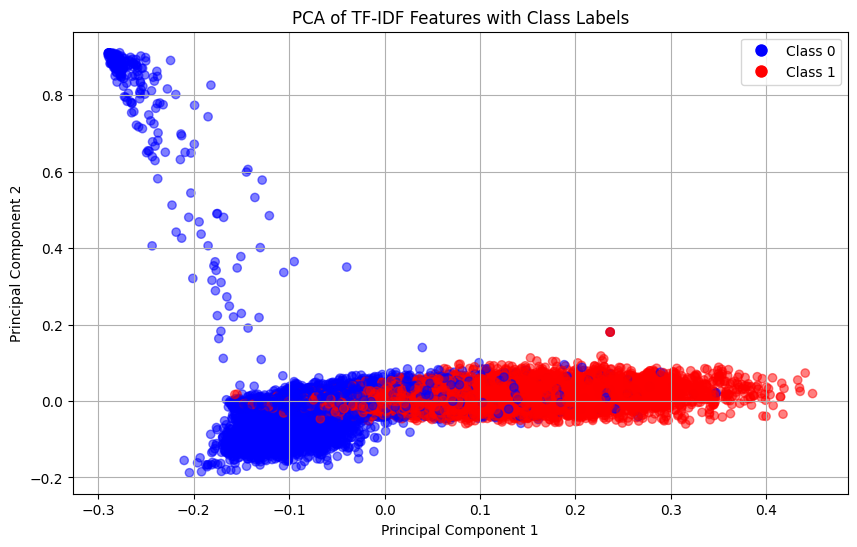

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize the TF-IDF Vectorizer with max_features set to 10,000
vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())  # Convert sparse matrix to dense

# Create a scatter plot with colors representing classes
plt.figure(figsize=(10, 6))

# Assign colors based on the labels
colors = {0: 'blue', 1: 'red'}
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], 
            c=df['label'].map(colors), alpha=0.5)

# Create a legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')])

plt.title('PCA of TF-IDF Features with Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

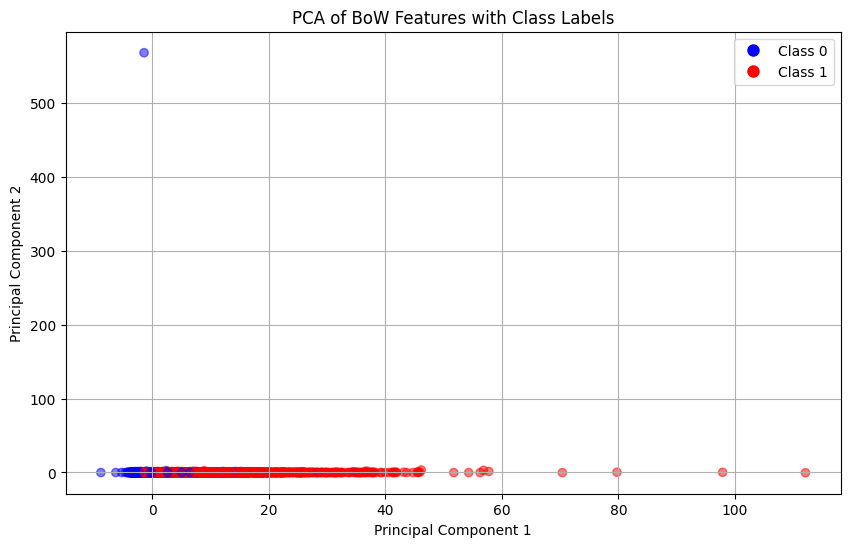

In [7]:
# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_bow = pca.fit_transform(bow_matrix.toarray())  # Convert sparse matrix to dense

# Create a scatter plot with colors representing classes
plt.figure(figsize=(10, 6))

# Assign colors based on the labels
colors = {0: 'blue', 1: 'red'}
plt.scatter(reduced_bow[:, 0], reduced_bow[:, 1], 
            c=df['label'].map(colors), alpha=0.5)

# Create a legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')])

plt.title('PCA of BoW Features with Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()